<a href="https://colab.research.google.com/github/Armin-Abdollahi/Bone-Age-Estimation/blob/main/Bone_Age_Resnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
# Load the labels
labels_path = '/content/drive/MyDrive/Digital_Hand_Atlas_Dataset/Total_Images/Bordered_XRay_Images/Label.csv'
labels = pd.read_csv(labels_path)

In [4]:
labels['Case ID'] = labels['Case ID'].apply(lambda x: str(x)+'.jpg')

labels.head()

,Case ID,Bone Age,Male,Location
0,1.jpg,0,False,Asian
1,2.jpg,0,False,Asian
2,3.jpg,0,False,Asian
3,4.jpg,0,False,Asian
4,5.jpg,0,False,Asian


In [5]:
# Ensure the 'Case ID' column is of type string
labels['Case ID'] = labels['Case ID'].astype(str)

In [6]:
# Create the image data generator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [7]:
# Create the train and validation generators
train_generator = datagen.flow_from_dataframe(
    dataframe=labels,
    directory='/content/drive/MyDrive/Digital_Hand_Atlas_Dataset/Total_Images/Bordered_XRay_Images',
    x_col='Case ID',
    y_col='Bone Age',
    target_size=(256, 256),
    color_mode='rgb',  # Change to 'rgb' for 3 channels
    class_mode='raw',
    batch_size=32,
    subset='training'
)

validation_generator = datagen.flow_from_dataframe(
    dataframe=labels,
    directory='/content/drive/MyDrive/Digital_Hand_Atlas_Dataset/Total_Images/Bordered_XRay_Images',
    x_col='Case ID',
    y_col='Bone Age',
    target_size=(256, 256),
    color_mode='rgb',  # Change to 'rgb' for 3 channels
    class_mode='raw',
    batch_size=32,
    subset='validation'
)

Found 5915 validated image filenames.
Found 1478 validated image filenames.


In [8]:
# Load pre-trained ResNet-50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [9]:
# Add custom layers for regression
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(1, activation='linear')(x)

In [10]:
# Create the final model
model = tf.keras.Model(inputs=base_model.input, outputs=output_layer)

In [11]:
# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae', 'accuracy'])

In [12]:
# Train the model (use your train_generator and validation_generator)
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32,
    epochs=10
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


184/184 ━━━━━━━━━━━━━━━━━━━━ 2489s 13s/step - accuracy: 0.0539 - loss: 12.7904 - mae: 2.5045 - val_accuracy: 0.0679 - val_loss: 68.3177 - val_mae: 6.6382
Epoch 2/10
  1/184 ━━━━━━━━━━━━━━━━━━━━ 59s 325ms/step - accuracy: 0.0312 - loss: 2.7102 - mae: 1.3069

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


184/184 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.0312 - loss: 2.7102 - mae: 1.3069 - val_accuracy: 0.0000e+00 - val_loss: 90.9200 - val_mae: 7.4820
Epoch 3/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 263s 1s/step - accuracy: 0.0620 - loss: 4.0693 - mae: 1.5188 - val_accuracy: 0.0469 - val_loss: 75.8499 - val_mae: 7.1104
Epoch 4/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 36s 197ms/step - accuracy: 0.0312 - loss: 6.2082 - mae: 1.9020 - val_accuracy: 0.0000e+00 - val_loss: 82.1226 - val_mae: 8.5275
Epoch 5/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 277s 1s/step - accuracy: 0.0663 - loss: 3.2788 - mae: 1.3600 - val_accuracy: 0.0571 - val_loss: 74.9331 - val_mae: 7.1206
Epoch 6/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step - accuracy: 0.0938 - loss: 3.0384 - mae: 1.3430 - val_accuracy: 0.1667 - val_loss: 78.4002 - val_mae: 7.2228
Epoch 7/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 244s 1s/step - accuracy: 0.0665 - loss: 2.9480 - mae: 1.2846 - val_accuracy: 0.0904 - val_loss: 15.4007 - val_mae: 3.1400
Epoch 8/10
184/184 ━━━━━━━━━

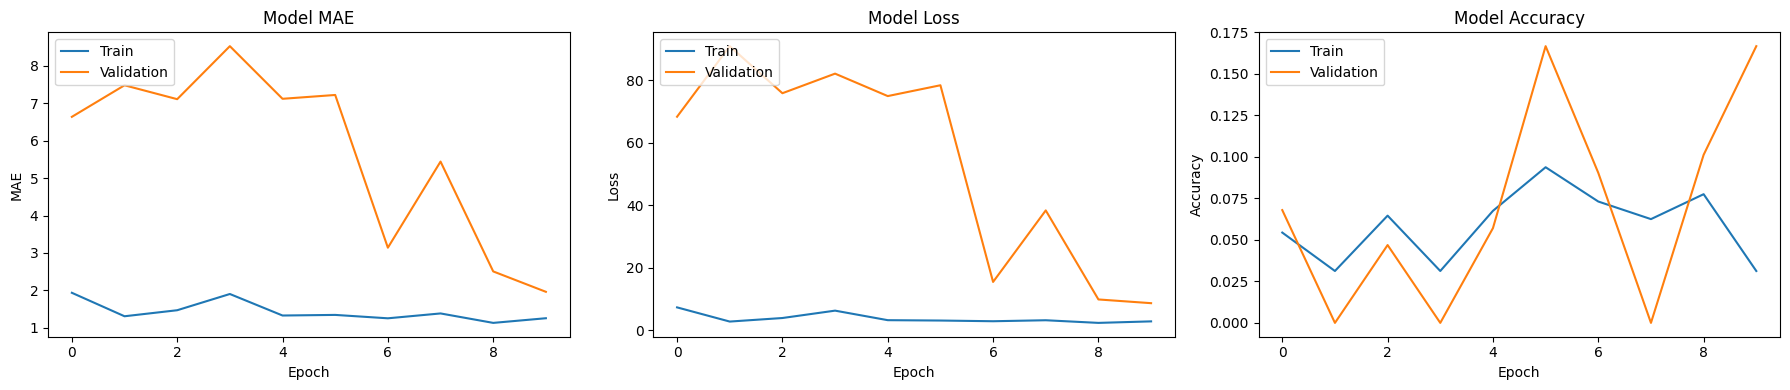

In [13]:
# Plot training & validation MAE values
plt.figure(figsize=(18, 4))

plt.subplot(1, 3, 1)
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation accuracy values
plt.subplot(1, 3, 3)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
# Train the model (use your train_generator and validation_generator)
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32,
    epochs=18
)

Epoch 1/18


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


184/184 ━━━━━━━━━━━━━━━━━━━━ 5809s 30s/step - accuracy: 0.0554 - loss: 13.4021 - mae: 2.5355 - val_accuracy: 0.0673 - val_loss: 53.2887 - val_mae: 5.7364
Epoch 2/18
  1/184 ━━━━━━━━━━━━━━━━━━━━ 1:05 358ms/step - accuracy: 0.0000e+00 - loss: 6.2861 - mae: 1.9253

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


184/184 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - accuracy: 0.0000e+00 - loss: 6.2861 - mae: 1.9253 - val_accuracy: 0.1667 - val_loss: 38.1391 - val_mae: 5.3470
Epoch 3/18


In [ ]:
# Plot training & validation MAE values
plt.figure(figsize=(18, 4))

plt.subplot(1, 3, 1)
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation accuracy values
plt.subplot(1, 3, 3)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()